In [1]:
import numpy as np
import cv2
from matplotlib import pyplot as plt

# loading images

1706
1280


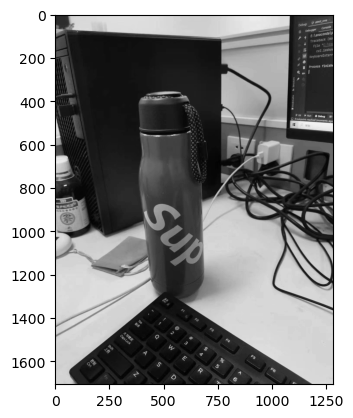

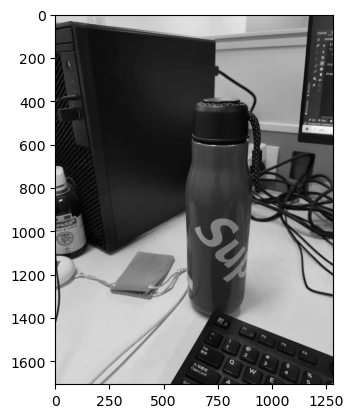

In [2]:
imgL = cv2.imread('image1.jpg',0)
imgR = cv2.imread('image2.jpg',0)
plt.figure()
plt.imshow(imgL, cmap="gray")
plt.figure()
plt.imshow(imgR, cmap="gray")

rows, cols = imgL.shape
print(rows)
print(cols)


# generating desparity map using BM

In [3]:
disparityImgSAD = np.zeros(imgR.shape)#定义了一个和右图 imgR 相同大小的零矩阵 disparityImgSAD，用于存储使用 SAD 算法得到的视差图像。
disparityImgSSD = np.zeros(imgR.shape)#定义了一个和右图 imgR 相同大小的零矩阵 disparityImgSSD，用于存储使用 SSD 算法得到的视差图像
disparityImg = np.zeros(imgR.shape)#定义了一个和右图 imgR 相同大小的零矩阵 disparityImg，用于存储最终得到的视差图像。
# checking if both images are same shape
print(disparityImgSAD.shape)
print(disparityImgSSD.shape)

(1706, 1280)
(1706, 1280)


## using SAD only

In [4]:
D = 16#定义最大视差范围为16个像素
halfWindow = 2
Window = 2 * halfWindow + 1#: 定义窗口大小为5x5（2 * halfWindow + 1）

for r in range(rows):#遍历每行像素。
  #Get the minimum and maximum row boundries, if the window lies outside
  #the picture in the upper part it will be 0, if the lower side it wil
  #be the height of the image
  min_row = max(0, r - halfWindow)#: 窗口的最小行号（上边界）。
  max_row = min(rows-1, r + halfWindow)#: 窗口的最大行号（下边界）。

  for h in range(cols):#遍历每列像素

    min_col = max(0, h - halfWindow)# 窗口的最小列号（左边界）。
    max_col = min(cols-1, h + halfWindow)#窗口的最大列号（右边界）。

    ## 计算当前像素在左图中的视差值范围
    min_D = max(-D, - min_col)
    max_D = min(D, cols - max_col - 1)

    # 获取右图中的当前像素所在窗口
    temp = imgR[min_row:max_row, min_col:max_col].astype(int)

    # # 初始化SAD数组，用于存储不同视差值下的SAD值。
    num_blocks = max_D - min_D

    SAD = np.zeros([num_blocks,1])

    for i in range(min_D, max_D):
      # # 从左图像中获取一个小块
      block = imgL[min_row:max_row, (min_col + i):(max_col + i)].astype(int)
      block_index = i - min_D
      SAD[block_index, 0] = sum(sum(abs(temp - block)))
  # 找到SAD值最小的视差值，即为当前像素在左图中对应的视差值
    match_index = np.argsort(SAD, axis=0)[0][0]
    d = abs(match_index  + min_D)## 计算视差值
    disparityImg[r,h] = d*255/8    ## 将计算出的视差值缩放到0~255的范围内

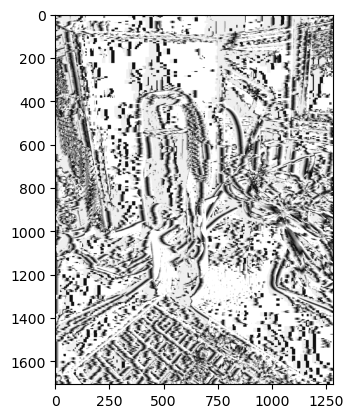

In [5]:
plt.imshow(disparityImg, cmap="gray")

## using SSD and SAD

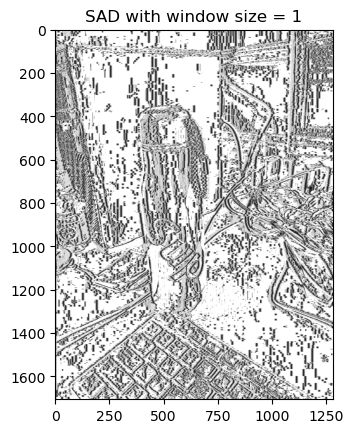

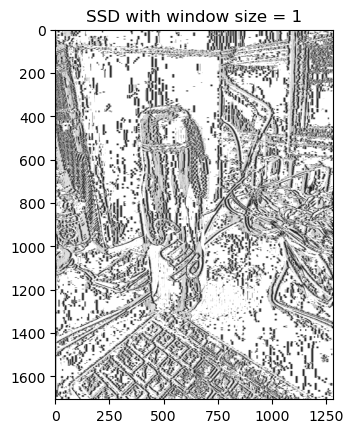

In [6]:
D = 8#设定视差范围的最大值，这里设定为8。

for r in range(rows):#循环遍历图像的每一行。

  for h in range(cols):# 在每一行中，循环遍历图像的每一列。
    min_D = max(-D, - h)#计算视差窗口向左位移的最小值。
    max_D = min(D, cols - h - 1)#计算视差窗口向右位移的最大值。

    temp = imgR[r, h].astype(int)#在右视图中选取像素点（r，h）作为参考像素点，将其转换为整型。

    num_blocks = max_D - min_D#计算视差范围内的块数。

    SAD = np.zeros([num_blocks,1])#用于存储SAD算法中所有块与参考像素点的绝对误差之和。
    SSD = np.zeros([num_blocks,1])#用于存储SSD算法中所有块与参考像素点的平方误差之和。
    # 循环遍历视差范围内的每个块
    for i in range(min_D, max_D):
      # 从左视图中获取一个与参考像素点在视差上对应的块。
      block = imgL[r, h+i].astype(int)#获取左图像中对应像素的灰度值，并将其转换为整型。
      block_index = i - min_D#计算当前块在SAD和SSD数组中的索引。
      SAD[block_index, 0] = abs(temp - block)#计算当前块与左图像中当前像素的SAD值，并将其存储到SAD数组中。
      SSD[block_index, 0] = (temp - block)**2#计算当前块与左图像中当前像素的SSD值，并将其存储到SSD数组中。
    # Get the most similar block
    match_indexSAD = np.argsort(SAD, axis=0)[0]#获取SAD数组中与当前像素匹配度最高的块的索引。
    match_indexSSD = np.argsort(SSD, axis=0)[0][0]#获取SSD数组中与当前像素匹配度最高的块的索引。
    d_SAD = abs(match_indexSAD  + min_D)#计算当前像素与右图像中匹配度最高的像素之间的视差（使用SAD算法）。
    d_SSD = abs(match_indexSSD + min_D)#计算当前像素与右图像中匹配度最高的像素之间的视差（使用SSD算法）。
    disparityImgSAD[r,h] = d_SAD*255/8#将当前像素的视差存储到SAD视差图像中。
    disparityImgSSD[r,h] = d_SSD*255/8#将当前像素的视差存储到SSD视差图像中。
plt.figure()
plt.title("SAD with window size = 1")
plt.imshow(disparityImgSAD, cmap="gray")

plt.figure()
plt.title("SSD with window size = 1")
plt.imshow(disparityImgSSD, cmap="gray")

## different window size

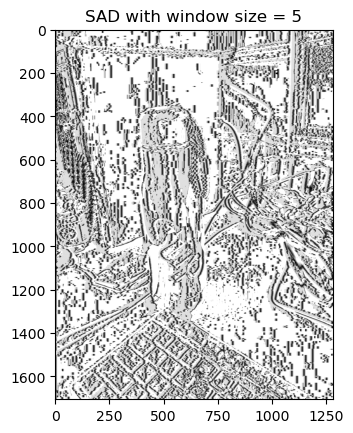

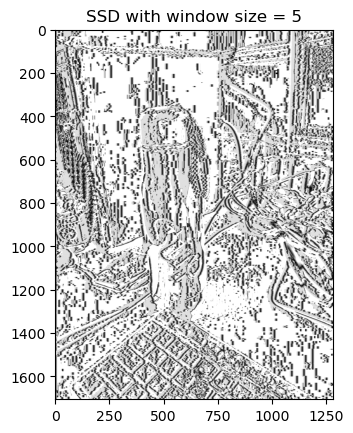

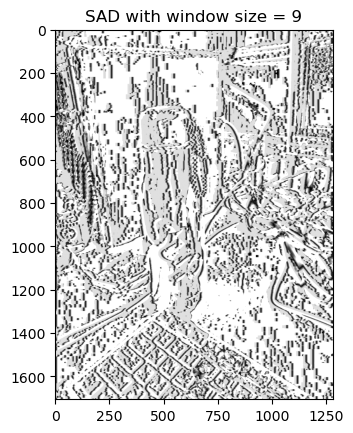

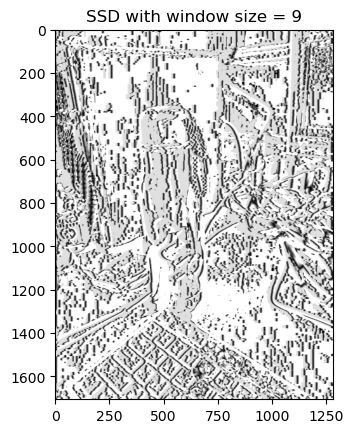

In [7]:
D = 8
halfWindow = [2,4]

disparityImg
for hw in halfWindow:
  for r in range(rows):
    #Get the minimum and maximum row boundries, if the window lies outside
    #the picture in the upper part it will be 0, if the lower side it wil
    #be the height of the image
    min_row = max(0, r - hw)
    max_row = min(rows-1, r + hw)

    for h in range(cols):
      #Get the minimum and maximum column boundries, if the window lies outside
      #the picture in the left part it will be 0, if the right side it wil
      #be the width of the image
      min_col = max(0, h - hw)
      max_col = min(cols-1, h + hw)

      #Get the number of the displacment of the window in the left and right side
      min_D = max(-D, - min_col)
      max_D = min(D, cols - max_col - 1)

      #Get the patch in the left image
      temp = imgR[min_row:max_row, min_col:max_col].astype(int)

      #Number of blocks
      num_blocks = max_D - min_D

      SAD = np.zeros([num_blocks,1])
      SSD = np.zeros([num_blocks,1])

      #Search in the disparity range
      for i in range(min_D, max_D):
        #Get the corresponding block in the second image
        block = imgL[min_row:max_row, (min_col + i):(max_col + i)].astype(int)
        block_index = i - min_D
        SAD[block_index, 0] = np.sum(abs(temp - block))
        SSD[block_index, 0] = np.sum((temp - block)**2)
      #Get the most similar block
      match_index_SAD = np.argsort(SAD, axis=0)[0][0]
      match_index_SSD = np.argsort(SSD, axis=0)[0][0]
      d_SAD = abs(match_index_SAD + min_D)
      d_SSD = abs(match_index_SSD + min_D)
      disparityImgSAD[r,h] = d_SAD*255/8
      disparityImgSSD[r,h] = d_SSD*255/8
      
  plt.figure()
  plt.title("SAD with window size = " + str(hw*2+1))
  plt.imshow(disparityImgSAD, cmap="gray")

  plt.figure()
  plt.title("SSD with window size = " + str(hw*2+1))
  plt.imshow(disparityImgSSD, cmap="gray")